## X-ray diffraction

We begin by loading the libraries you will require later on for your calculations.

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

Further you need to install the library [pyFAI](https://pyfai.readthedocs.io/en/stable/) that we will use in the remainder of this notebook.

In [2]:
# pip install ipywidgets --upgrade
# pip install jupyterlab
# pip install notebook

---
### Exercise 1

Go to the [pyFAI cookbook](https://pyfai.readthedocs.io/en/stable/usage/cookbook/calibration_with_jupyter.html) and **copy the different cells** into this notebook to try and recreate the calibration of the diffraction detector as described in the cookbook. **Discuss and describe** the different steps you are performing in your own words to make sure you understand the process.

**Hints:**
- you may need to select a different matplotlib interface (**nbagg**, **widget** or **inline**), depending on which environment you are using.
- when you get to the stage where you should select the rings on the detector, make sure that you **start at number 0** for the **innermost diffraction ring**.

---
#### Become familiar with pyFAI cookbook
_- solve the exercise beneath using markdown and/or code blocks -_

In [3]:
from IPython.display import Video

Video("http://www.silx.org/pub/pyFAI/video/Calibration_Jupyter.mp4", width=800)


In [4]:
for lib in ["jupyterlab", "notebook", "matplotlib", "ipympl", "ipywidgets"]:
    mod = __import__(lib)
    print(f"{lib:12s}:   {mod.__version__}")

jupyterlab  :   4.3.3
notebook    :   7.3.1
matplotlib  :   3.9.2
ipympl      :   0.9.4
ipywidgets  :   8.1.5


In [5]:
# The notebook interface (nbagg) is needed in jupyter-notebook while the widget is recommended for jupyer lab
# %matplotlib nbagg
# %matplotlib widget
# %matplotlib inline
# For the integration in the documentation, one uses `inline` to capture figures.
%matplotlib inline

import pyFAI
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration

print(f"PyFAI version {pyFAI.version}")

PyFAI version 2024.9.0


In [6]:
# Some parameters like the wavelength, the calibrant and the diffraction image:
wavelength = 1e-10
pilatus = pyFAI.detector_factory("Pilatus1M")
AgBh = pyFAI.calibrant.CALIBRANT_FACTORY("AgBh")
AgBh.wavelength = wavelength


In [8]:
# Some parameters like the wavelength, the calibrant and the diffraction image:
wavelength = 1e-10
pilatus = pyFAI.detector_factory("Pilatus1M")
AgBh = pyFAI.calibrant.CALIBRANT_FACTORY("AgBh")
AgBh.wavelength = wavelength

# load some test data (requires an internet connection)
img = fabio.open(pyFAI.test.utilstest.UtilsTest.getimage("Pilatus1M.edf")).data

<Axes: >

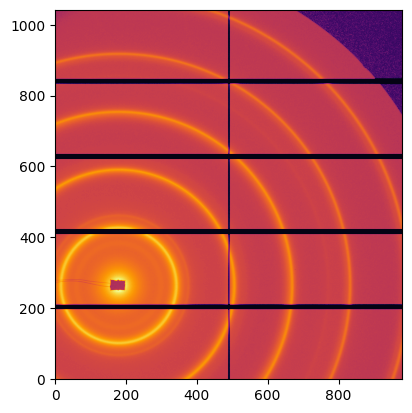

In [10]:
# Simply display the scattering image:
jupyter.display(img)

In [11]:
%matplotlib widget
calib = Calibration(img, calibrant=AgBh, wavelength=wavelength, detector=pilatus)
# This displays the calibration widget:

# 1. Set the ring number (0-based value), below the plot
# 2. Pick the ring by right-clicking with the mouse on the image.
# 3. Restart at 1. for at least a second ring
# 4. Click refine to launch the calibration.

[  388,  285 ] --> [ 387.9, 284.0 ] after   0 iterations 
[  195,   31 ] --> [ 193.5,  32.0 ] after   0 iterations 
[  329,  330 ] --> [ 329.0, 328.1 ] after   0 iterations 
[  119,  249 ] --> [ 117.0, 250.0 ] after   0 iterations 
[  139,   78 ] --> [ 136.7,  76.9 ] after   0 iterations 
[  129,  271 ] --> [ 129.7, 271.2 ] after   0 iterations 
[  213,  332 ] --> [ 212.5, 334.0 ] after   0 iterations 
[  124,   99 ] --> [ 121.7,  99.0 ] after   0 iterations 
[  270,  342 ] --> [ 270.0, 342.0 ] after   0 iterations 
[  100,  158 ] --> [ 102.0, 158.0 ] after   0 iterations 
[  125,  267 ] --> [ 127.7, 268.2 ] after   0 iterations 
[  102,  199 ] --> [ 102.0, 200.0 ] after   0 iterations 
[  374,  299 ] --> [ 372.3, 300.3 ] after   1 iterations 
[  301,  336 ] --> [ 303.0, 337.3 ] after   0 iterations 
[  291,  341 ] --> [ 289.9, 340.0 ] after   0 iterations 
[  146,  295 ] --> [ 148.0, 294.0 ] after   0 iterations 
[  266,   17 ] --> [ 267.0,  17.0 ] after   0 iterations 
[  108,  226 ]

[  589,  137 ] --> [ 586.8, 138.0 ] after   0 iterations 
[  572,   70 ] --> [ 569.4,  69.0 ] after   0 iterations 
[  591,  186 ] --> [ 589.1, 188.0 ] after   0 iterations 
[  379,  481 ] --> [ 379.0, 484.0 ] after   0 iterations 
[  443,  449 ] --> [ 443.8, 451.2 ] after   0 iterations 
[  587,  175 ] --> [ 589.1, 174.0 ] after   0 iterations 
[   43,  422 ] --> [  46.1, 421.9 ] after   0 iterations 
[  583,  245 ] --> [ 583.7, 244.0 ] after   0 iterations 
[   85,  450 ] --> [  85.2, 451.9 ] after   0 iterations 
[  236,  506 ] --> [ 235.9, 503.8 ] after   1 iterations 
[  589,  200 ] --> [ 588.9, 201.0 ] after   0 iterations 
[  587,  141 ] --> [ 587.2, 140.1 ] after   0 iterations 
[  391,  480 ] --> [ 388.9, 479.8 ] after   0 iterations 
[  449,  450 ] --> [ 447.0, 448.9 ] after   0 iterations 
[  461,  439 ] --> [ 462.0, 437.8 ] after   0 iterations 
[  588,  147 ] --> [ 587.9, 147.0 ] after   0 iterations 
[  532,  365 ] --> [ 530.8, 366.0 ] after   0 iterations 
[  303,  503 ]

[  740,   80 ] --> [ 741.7,  78.1 ] after   0 iterations 
[  105,  644 ] --> [ 104.0, 642.0 ] after   0 iterations 
[    6,  594 ] --> [   6.7, 595.0 ] after   0 iterations 
[  245,  665 ] --> [ 244.0, 668.0 ] after   0 iterations 
[  464,  627 ] --> [ 464.0, 625.7 ] after   0 iterations 
[   66,  629 ] --> [  65.7, 626.3 ] after   0 iterations 
[  488,  615 ] --> [ 485.8, 614.9 ] after   0 iterations 
[  618,  514 ] --> [ 617.5, 516.0 ] after   0 iterations 
[  164,  657 ] --> [ 163.9, 657.8 ] after   0 iterations 
[  366,  658 ] --> [ 368.1, 656.5 ] after   0 iterations 
[   42,  613 ] --> [  39.9, 613.8 ] after   2 iterations 
[  446,  635 ] --> [ 445.0, 633.0 ] after   0 iterations 
[  750,  189 ] --> [ 752.1, 186.0 ] after   0 iterations 
[  753,  170 ] --> [ 752.1, 170.0 ] after   0 iterations 
[  563,  565 ] --> [ 560.1, 567.8 ] after   0 iterations 
[  751,  149 ] --> [ 751.2, 150.0 ] after   0 iterations 
[   25,  609 ] --> [  28.3, 608.2 ] after   0 iterations 
[  358,  659 ]

[  289,  831 ] --> [ 287.7, 831.1 ] after   0 iterations 
[  438,  805 ] --> [ 437.8, 808.1 ] after   0 iterations 
[    6,  780 ] --> [   4.1, 778.2 ] after   0 iterations 
[  213,  830 ] --> [ 212.5, 830.0 ] after   0 iterations 
[  377,  821 ] --> [ 375.8, 821.7 ] after   0 iterations 
[  143,  817 ] --> [ 141.1, 820.6 ] after   0 iterations 
[   20,  782 ] --> [  17.9, 783.2 ] after   0 iterations 
[  395,  816 ] --> [ 393.8, 818.3 ] after   0 iterations 
[  825,  514 ] --> [ 824.3, 513.8 ] after   0 iterations 
[   11,  780 ] --> [   8.0, 779.4 ] after   0 iterations 
[  135,  819 ] --> [ 136.8, 819.3 ] after   0 iterations 
[  257,  828 ] --> [ 253.0, 831.8 ] after   1 iterations 
[  493,  789 ] --> [ 492.7, 790.6 ] after   0 iterations 
[  771,  591 ] --> [ 769.1, 592.3 ] after   0 iterations 
[    0,  774 ] --> [   0.0, 777.0 ] after   0 iterations 
[  188,  827 ] --> [ 188.0, 828.0 ] after   0 iterations 
[  742,  623 ] --> [ 742.1, 623.2 ] after   0 iterations 
[  393,  820 ]

c:\Users\carst\Unibox Rostock\lehre\SynchrotronTechniques\CDMA_lecture_STMC\.venv\Lib\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Before refinement, the geometry is:
Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634169e+00 m	PONI= 2.791538e-02, 2.202918e-02 m	rot1=-0.005441  rot2=0.010706  rot3=0.000000 rad
DirectBeamDist= 1634.287 mm	Center: x=179.770, y=264.020 pix	Tilt= 0.688° tiltPlanRotation= 63.061° 𝛌= 1.000Å
Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634169e+00 m	PONI= 2.791558e-02, 2.202938e-02 m	rot1=-0.005441  rot2=0.010706  rot3=0.000000 rad
DirectBeamDist= 1634.287 mm	Center: x=179.775, y=264.024 pix	Tilt= 0.688° tiltPlanRotation= 63.060° 𝛌= 1.000Å
Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634169e+00 m	PONI= 2.791558e-02, 2.202938e-02 m	rot1=-0.005441  rot2=0.010706  rot3=0.000000 rad
DirectBeamDist= 1634.287 mm	Center: x=179.775, y=264.024 pix	Tilt= 0.688° tiltPlanRotation= 63.060° 𝛌= 1.000Å


In [13]:
# This is the calibrated geometry:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634169e+00 m	PONI= 2.791558e-02, 2.202938e-02 m	rot1=-0.005441  rot2=0.010706  rot3=0.000000 rad
DirectBeamDist= 1634.287 mm	Center: x=179.775, y=264.024 pix	Tilt= 0.688° tiltPlanRotation= 63.060° 𝛌= 1.000Å
Fixed parameters: ['wavelength', 'rot3']
Cost function: 6.803820945439876e-07


In [14]:
# re-extract all control points using the "massif" algorithm
calib.extract_cpt()

In [15]:
# remove the last ring since it is outside the flight-tube
calib.remove_grp(lbl="f")

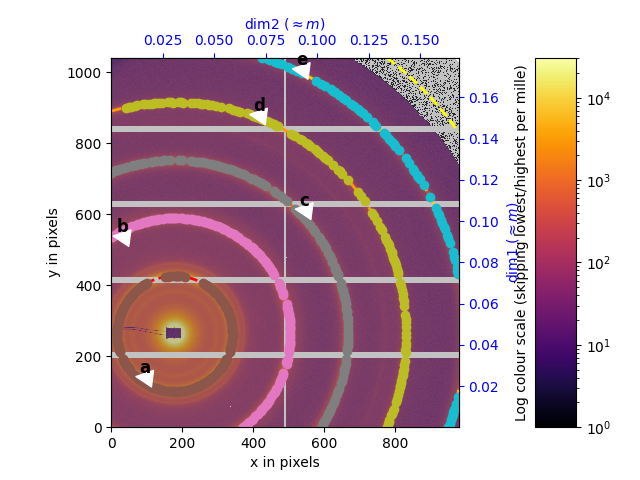

In [16]:
# Switch back to `inline` mode to capture the last plot
%matplotlib inline
calib.peakPicker.widget.fig.show()

In [17]:
# Those are some control points: the last column indicates the ring number
calib.geoRef.data[::100]

array([[142.82127631,  69.90446181,   0.        ],
       [281.03183712, 341.1115294 ,   0.        ],
       [157.94724632, 303.26957819,   0.        ],
       [251.0489971 , 504.97883448,   1.        ],
       [737.62359852, 300.96557732,   2.        ],
       [508.96200312, 601.93419603,   2.        ],
       [582.08113302, 748.88286022,   3.        ],
       [936.88517766, 641.92864167,   4.        ]])

In [18]:
# This is the geometry with all rings defined:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.634169e+00 m	PONI= 2.791558e-02, 2.202938e-02 m	rot1=-0.005441  rot2=0.010706  rot3=0.000000 rad
DirectBeamDist= 1634.287 mm	Center: x=179.775, y=264.024 pix	Tilt= 0.688° tiltPlanRotation= 63.060° 𝛌= 1.000Å
Fixed parameters: ['wavelength', 'rot3']
Cost function: 8.117141475916962e-07


In [19]:
# Geometry refinement with some constrains: SAXS mode
# Here we enforce all rotation to be null and fit again the model:

gr.rot1 = gr.rot2 = gr.rot3 = 0
gr.refine3(fix=["rot1", "rot2", "rot3", "wavelength"])
print(gr)
print(f"Cost function = {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.635043e+00 m	PONI= 4.542553e-02, 3.093222e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1635.043 mm	Center: x=179.839, y=264.102 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.000Å
Cost function = 9.516444089142236e-07


In [20]:
gr.save("jupyter.poni")
gr.get_config()

OrderedDict([('poni_version', 2.1),
             ('detector', 'Pilatus1M'),
             ('detector_config',
              {'orientation': <Orientation.BottomRight: 3>}),
             ('dist', np.float64(1.6350431756906945)),
             ('poni1', np.float64(0.04542552969346652)),
             ('poni2', np.float64(0.030932223273837833)),
             ('rot1', 0.0),
             ('rot2', 0.0),
             ('rot3', 0.0),
             ('wavelength', 1e-10)])

In [21]:
# Create a "normal" azimuthal integrator (without fitting capabilities from the geometry-refinement object)
ai = pyFAI.load(gr)
ai

Detector Pilatus 1M	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.000000e-10 m
SampleDetDist= 1.635043e+00 m	PONI= 4.542553e-02, 3.093222e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1635.043 mm	Center: x=179.839, y=264.102 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.000Å

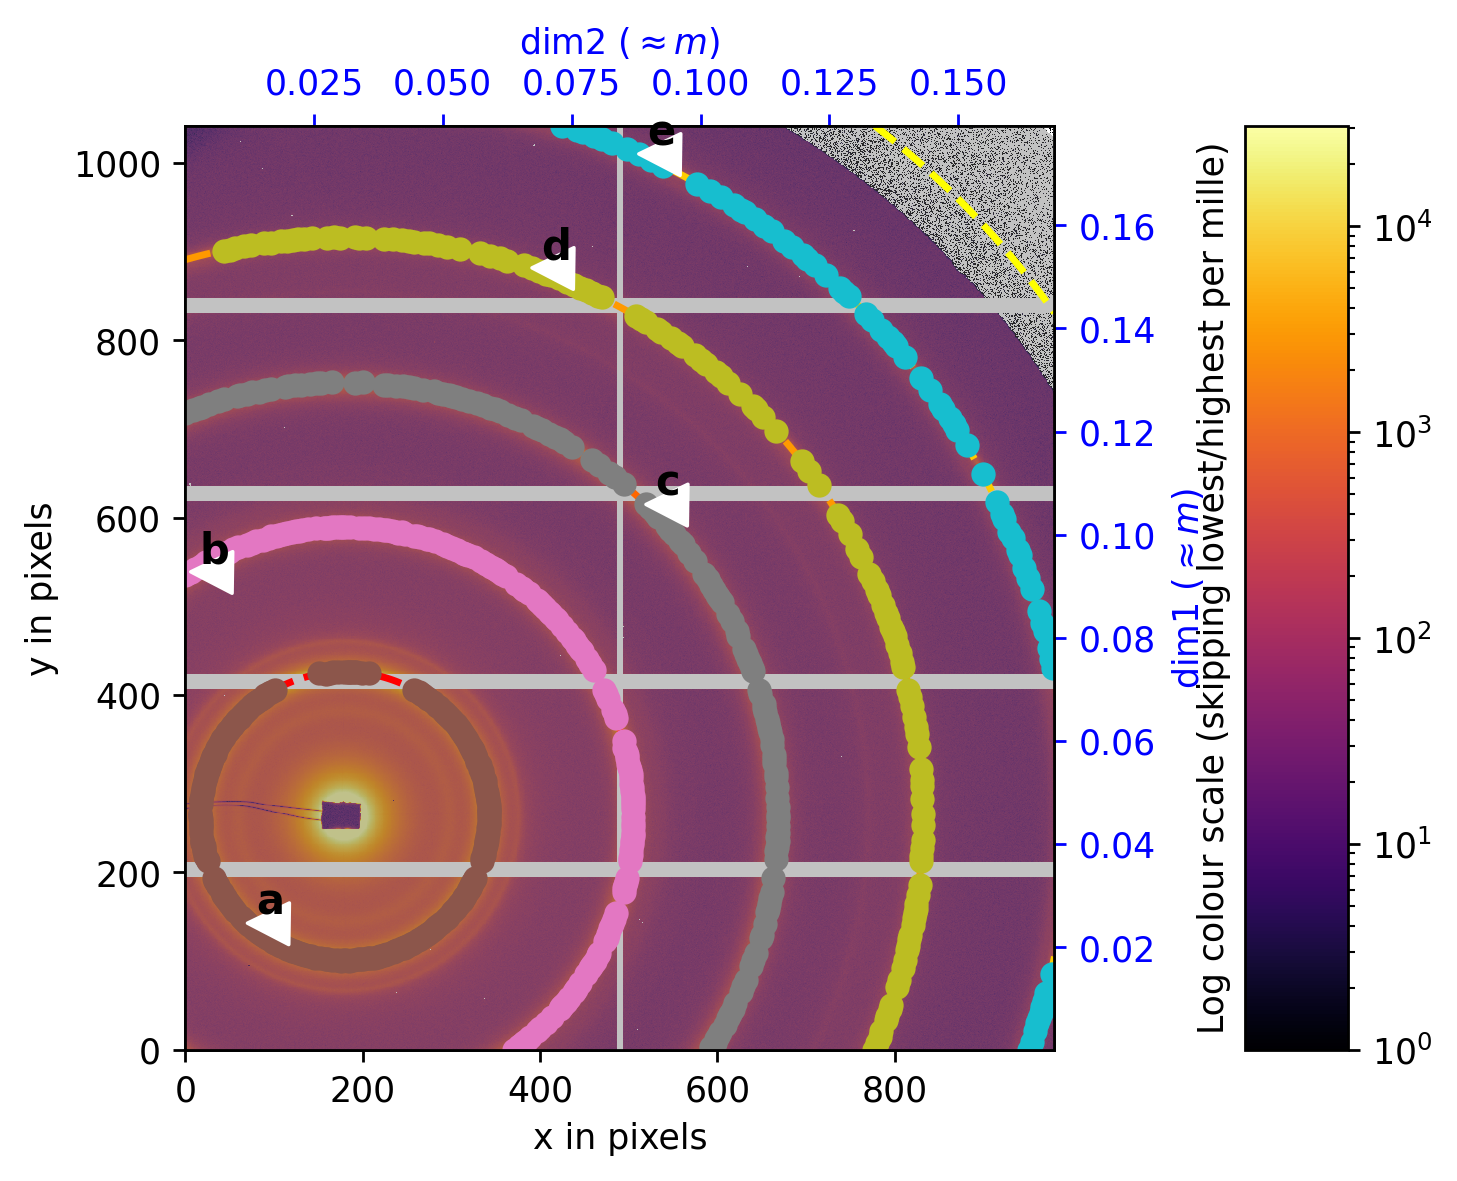

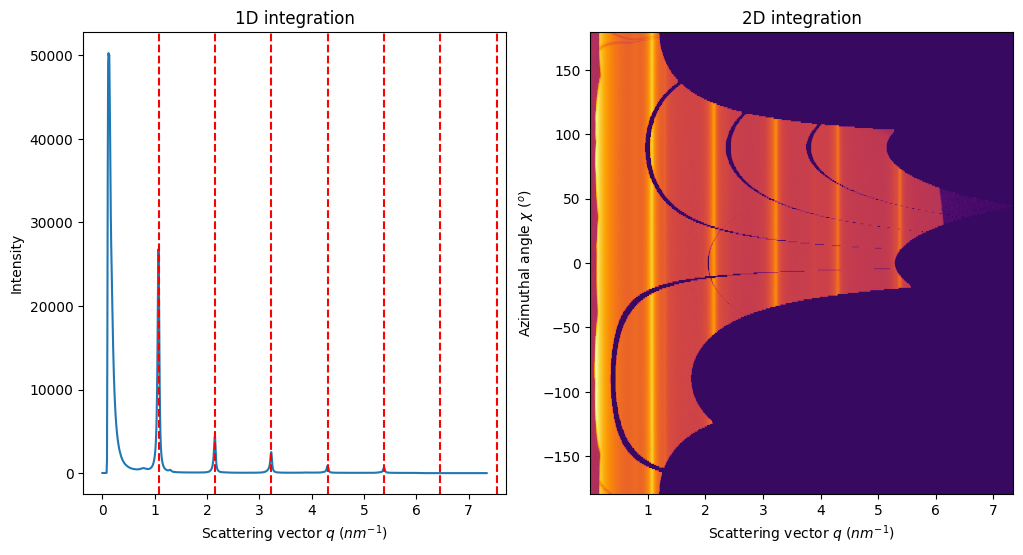

In [22]:
# Display the integrated data to validate the calibration.
fig, ax = subplots(1, 2, figsize=(12, 6))
jupyter.plot1d(ai.integrate1d(img, 1000), calibrant=AgBh, ax=ax[0])
jupyter.plot2d(ai.integrate2d(img, 1000), calibrant=AgBh, ax=ax[1])
_ = ax[1].set_title("2D integration")

---
### Exercise 2

In this exercise, you will perform another detector calibration and then continue to integrate data from a recent experiment.  

In a **first step**, use the **code snippets** copied in the [pyFAI cookbook](https://pyfai.readthedocs.io/en/stable/usage/cookbook/calibration_with_jupyter.html) from **Exercise 1** to adapt the calibration process of the cookbook **only for relevant steps**. You can write a function or simply adapt the given code for the relevant parts only.

The mentioned diffraction experiment was performed at an **X-ray energy** of $87.1\,\text{keV}$. The detector calibration data is given in the file `Lab6-00001.tif` located in the **data folder**. 
To sucessfully perform the calibration, you have to use [Lanthanum hexaboride](https://en.wikipedia.org/wiki/Lanthanum_hexaboride) ``LaB6`` as **calibrant**, ``PerkinElmer`` ([Link]([detector](https://resources.perkinelmer.com/corporate/pdfs/downloads/bro_digitalxraydetectors.pdf))) as **detector**.

**Given Constants:**
- Speed of light, $ c = 3 \times 10^8 \, \text{m/s} $
- Planck's constant, $ h = 4.136 \times 10^{-15} \, \text{eV} \cdot \text{s} $
- Beam Energie, $ E_0 = 87.1 \, \text{keV} $

**Hint:**
- The imported ``Calibration`` Class from [pyFAI](https://pyfai.readthedocs.io/en/stable/) exspects wavelength given in Å.

**Acknowledgments:**  
The data used in this exercise is courtesy of **Dr. Florian Wieland** at Helmholtz-Zentrum Hereon.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [24]:
# Import relevant modules
import fabio
import pyFAI
from pyFAI.calibrant import CALIBRANT_FACTORY
from matplotlib import pyplot as plt
from pyFAI.gui.jupyter.calib import Calibration
from pyFAI.gui import jupyter

In [25]:
# function to plot execute calibration after interactive
def calibration_results(calibrated_image_object, nbr_of_points=1000):
    """
    Calibrates the geometry for SAXS mode by extracting control points, refining the geometry,
    and validating the calibration through azimuthal integration of the provided image data.

    Parameters:
    calibrated_image_object: An object that contains the calibration data and methods for extraction and refinement.
    nbr_of_points: The number of points for azimuthal integration (default is 1000).

    Returns:
    integrator: An azimuthal integrator object created from the calibrated geometry.
    """
    calib = calibrated_image_object
    calib.extract_cpt()  # re-extract all control points using the "massif" algorithm
    calib.remove_grp(lbl="f")  # Remove rings outside the flight-tube

    # Geometry after control points extraction
    geometry = calib.geoRef

    # Apply constraints for SAXS mode and refine
    geometry.rot1 = geometry.rot2 = geometry.rot3 = 0
    geometry.refine3(fix=["rot1", "rot2", "rot3", "wavelength"])
    print(geometry)
    print(f"Fixed parameters: {calib.fixed}")
    print(f"Cost function = {geometry.chi2()}")

    # Create an azimuthal integrator from the calibrated geometry
    integrator = pyFAI.load(geometry)

    # Validate calibration by displaying integrated data
    fig, ax = plt.subplots(1, 2)
    jupyter.plot1d(
        integrator.integrate1d(img, nbr_of_points), calibrant=calib.calibrant, ax=ax[0]
    )
    jupyter.plot2d(
        integrator.integrate2d(img, nbr_of_points), calibrant=calib.calibrant, ax=ax[1]
    )
    ax[0].set_title("1D Integration")
    ax[1].set_title("2D Integration")
    plt.tight_layout()
    plt.show()

    return integrator

In [28]:
# set interface [widget, inline, nbagg]
%matplotlib widget

# define experimental parameters
E = 87.1e3  # energy in eV
c = 3e8  # speed of light in m/s
h = 4.136e-15  # Planck's constant in eV*s
wavelength = c * h / E  # in m
image_path = "../data/Lab6-00001.tif"

calibrant_name = "LaB6"  # ["AgBh", "LaB6"] depends on calibrant used in experiment
detector_name = "PerkinElmer"  # ["Pilatus1M", "PerkinElmer", "Eiger9M"] depends on detector used in experiment

# Set up the detector and calibrant
detector = pyFAI.detector_factory(detector_name)
calibrant = CALIBRANT_FACTORY(calibrant_name)
calibrant.wavelength = wavelength

# Load the image data
img = fabio.open(image_path).data

# Initialize calibration & display interactive calibration widget
print(
    "",
    "Please follow the instructions to perform the calibration.",
    "1. Set the ring number (0-based value), below the plot",
    "2. Pick the ring by right-clicking with the mouse on the image.",
    "3. Restart at 1. for at least a second ring",
    "4. Click refine to launch the calibration.",
    sep="\n",
)
# calib = Calibration(img, calibrant=AgBh, wavelength=wavelength, detector=pilatus)

calibrated_image_object = Calibration(
    img, calibrant=calibrant_name, detector=detector_name, wavelength=wavelength
)

# do not paste in further code beneath,
# because you first have to run the calibration process,
# before further calculate the results


Please follow the instructions to perform the calibration.
1. Set the ring number (0-based value), below the plot
2. Pick the ring by right-clicking with the mouse on the image.
3. Restart at 1. for at least a second ring
4. Click refine to launch the calibration.


[  814, 1259 ] --> [ 813.9, 1260.9 ] after   0 iterations 
[  706, 1045 ] --> [ 706.5, 1045.0 ] after   0 iterations 
[ 1265,  833 ] --> [ 1265.8, 832.1 ] after   0 iterations 
[ 1203,  772 ] --> [ 1202.8, 771.5 ] after   0 iterations 
[ 1262,  830 ] --> [ 1262.0, 827.3 ] after   0 iterations 
[  989,  713 ] --> [ 990.1, 712.0 ] after   0 iterations 
[ 1309,  909 ] --> [ 1309.8, 909.0 ] after   0 iterations 
[  865, 1296 ] --> [ 866.1, 1297.8 ] after   0 iterations 
[ 1080,  716 ] --> [ 1081.0, 717.8 ] after   0 iterations 
[  787, 1233 ] --> [ 786.8, 1234.0 ] after   0 iterations 
[  855, 1290 ] --> [ 852.9, 1289.3 ] after   0 iterations 
[ 1180,  755 ] --> [ 1179.7, 755.8 ] after   0 iterations 
[ 1090,  719 ] --> [ 1087.0, 718.7 ] after   0 iterations 
[ 1233, 1250 ] --> [ 1232.6, 1252.7 ] after   0 iterations 
[ 1278, 1197 ] --> [ 1279.9, 1195.7 ] after   0 iterations 
[ 1223,  788 ] --> [ 1223.0, 786.9 ] after   0 iterations 
[  715,  951 ] --> [ 714.0, 951.1 ] after   0 iteration

Detector Perkin detector%s	 PixelSize= 200µm, 200µm
Wavelength= 1.424569e-11 m
SampleDetDist= 1.825708e+00 m	PONI= 2.037843e-01, 2.049043e-01 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1825.708 mm	Center: x=1024.522, y=1018.922 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 0.142Å
Fixed parameters: ['wavelength', 'rot3']
Cost function = 1.5263745452181106e-05


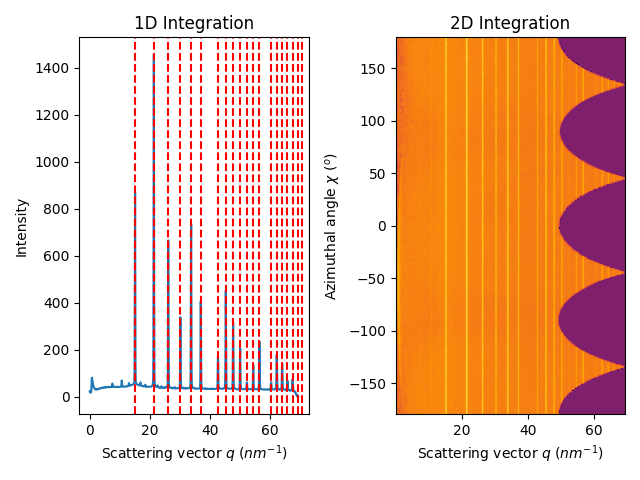

In [29]:
my_integrator = calibration_results(calibrated_image_object)

---
### Exercise 2 - continuing

In **the second step**, we wish to load the diffraction data from a sample during a tensile test experiment. Start by loading both ``Mg10Gd_sample4_5_10minus5-00001.tif`` and ``Mg10Gd_sample4_5_10minus5-00060.tif`` and display at least one diffraction spectrum.

**Steps form above repeated:**

1. Display the detector image
2. Now perform the calibration as you did before.
3. Extract the calibrated geometry. Note that in this instance we will not perform any changes to the initial geometry, as no flight tube was used and we assume that a detector tilt is possible.
4. Create the azimuthal integrator as above.
5. Finish by displaying the integrated detector image. This is useful to check that you performed the calibration well. If you notice that the red lines are not coinciding with the major peaks you should go back to the calibration step.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [ ]:
sample1 = fabio.open("/Mg10Gd_sample4_5_10minus5-00001.tif").data
sample60 = fabio.open("/Mg10Gd_sample4_5_10minus5-00060.tif").data
jupyter.plot1d(my_integrator.integrate1d(, ))

You should be seeing three larger peaks at q-values between $20$ and $30\,\text{nm}^{-1}$. We now wish to fit the first of these three peaks and see how its position and width differ between the two images. Start by saving the azimuthal integrations in two arrays.

In [44]:
spectrum1 = my_integrator.integrate1d(, )
spectrum60 = 

To perform the fitting, it is useful to narrow down you data to that surrounding the peak (with no further peaks included). Therefore, generate arrays with contain only the peak we wish to fit and display both peaks. How do they differ visually?

In [ ]:
xdata1 = spectrum1[]
ydata1 = spectrum1[]

xdata1_peak = xdata1[() & ()]
ydata1_peak = 

xdata60 = 
ydata60 = 

xdata60_peak = 
ydata60_peak = 

fig, ax = plt.subplots(1, 2)
ax[0].plot(xdata1_peak, ydata1_peak)
ax[0].set_xlabel("Scattering vector q / nm$^{-1}$")
ax[0].set_title("Data 1")
ax[0].set_ylabel("Intensity")
ax[1].plot(xdata60_peak, ydata60_peak)
ax[1].set_xlabel("Scattering vector q / nm$^{-1}$")
ax[1].set_ylabel("Intensity")
ax[1].set_title("Data 60")
fig.tight_layout()
plt.show()

The peak for the `...s5-00060.tif` sample appears a little broader. In terms of the intensity, no differences are apparent.

In the **next step** define two functions: 
1. Define a **Gauss function** which will return the y-values of a Gaussian function given the x-values and the different parameters. Your Gauss function should take the form $$y=C+A\times e^{-\frac{(x-x_0)^2}{2\sigma^2}}$$
2. Define a **cost function** that computes the $L2$ **norm** of a given y-data and the Gaussian function from above with given x and parameter values

In [46]:
# define the gauss function
def gauss(x, params):
    y_g = 
    return y_g


# define a function that computes and returns the L2 loss
def cost_function(params, x, y):
    L2 = 
    return L2

We will **now fit two Gaussians** using the functions we have defined by using the **scipy function** [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize). Based on the visual appearance above, you should set initial values for the parameters of the Gaussian function. The output of the function contains the optimal parameter set. Using these, plot the two original peaks and the fitted Gaussians for a visual comparison. If your fit was successful, these should differ only slightly. 

In [ ]:
par0 = [1500, 10000, 22.5, 0.2]

output1 = minimize(, par0, args=(xdata1_peak, ydata1_peak))
fit_y1 = gauss(xdata1_peak, output1.x)

output60 = 
fit_y60 = 

fig, ax = plt.subplots(1, 2)
ax[0].plot(xdata1_peak, ydata1_peak, label="data")
ax[0].plot(xdata1_peak, fit_y1, linestyle="dashed", label="fit")
ax[0].set_xlabel("Scattering vector q / nm$^{-1}$")
ax[0].set_ylabel("Intensity")
ax[0].set_title("Data 1")
ax[0].legend()
ax[1].plot(xdata60_peak, ydata60_peak, label="data")
ax[1].plot(xdata60_peak, fit_y60, linestyle="dashed", label="fit")
ax[1].set_xlabel("Scattering vector q / nm$^{-1}$")
ax[1].set_ylabel("Intensity")
ax[1].set_title("Data 60")
ax[1].legend()
plt.show()

**Finally**, determine the **lattice spacing of the peaks** that you have fitted. Which **Mg-peak** are we assessing? How much do the lattice spacings and the FWHM (full width at half maximum) differ between the two measurements? How are you interpreting the results?

In [ ]:
d1_peak = 
print(
    "The peak position fitted for diffractogram 1 is", np.round(d1_peak, 4), "Angström."
)
fwhm1 = 
print("The full width at half maximum for diffractogram 1 is", np.round(fwhm1, 3))

d60_peak = 
print(
    "The peak position fitted for diffractogram 60 is",
    np.round(d60_peak, 4),
    "Angström.",
)
fwhm60 = 
print("The full width at half maximum for diffractogram 60 is", np.round(fwhm60, 3))

The fitted peak is the **Mg (100) peak**. The peak can be checked [here](http://rruff.geo.arizona.edu/AMS/amcsd.php). The peak position is differing only slightly, yet the FWHM (full width at half maximum) has changed significantly, which coincides with what we observed visually. The broadening of the peak is due to a strain that is introduced on the crystal lattice, as the experiment at hand is a tensile test. `...s5-00001.tif` is at **0 N** tensile load and `...s5-00060.tif` at **5.26 kN**.